In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
heart = pd.read_csv('./heart.csv')

__About this dataset__

1. Age : Age of the patient

2. Sex : Sex of the patient

3. cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain 비심장성 통증: 이런 경우, 흉통은 분명히 존재하지만, 심장에 이상이 없다고 판명이 날 때, 비심장성 흉통이라고 한다.
- Value 3: asymptomatic

4. trtbps : resting blood pressure (in mm Hg)

5. chol : cholestoral in mg/dl fetched via BMI sensor

6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach : maximum heart rate achieved

9. exng: exercise induced angina (1 = yes; 0 = no)

10. oldpeak: Previous peak | ST depression induced by exercise relative to rest

11. slp: Slope | the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

12. caa: number of major vessels (0-3)

13. thall: Thal rate (0-3) 

fixed defect - 고정 관류 결손 

reversible defect - 가역적인 관류 결손

target : 
- 0 = less chance of heart attack 
- 1 = more chance of heart attack

http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html

### 데이터 분석

In [3]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<AxesSubplot:ylabel='Frequency'>

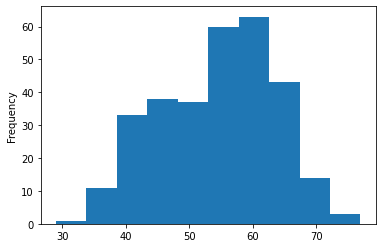

In [4]:
heart['age'].plot(kind='hist')

In [5]:
print(heart['sex'].value_counts())

1    207
0     96
Name: sex, dtype: int64


In [6]:
print(heart['cp'].value_counts())

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


<AxesSubplot:ylabel='Frequency'>

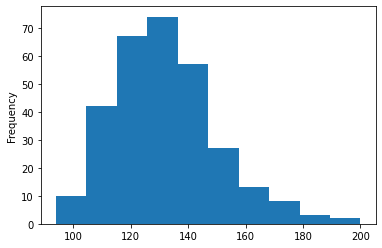

In [7]:
heart['trtbps'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

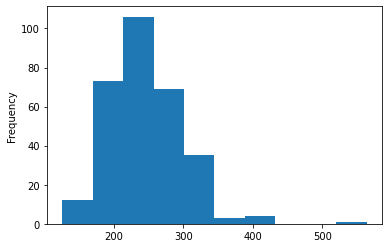

In [8]:
heart['chol'].plot(kind='hist')

In [9]:
print(heart['fbs'].value_counts())

0    258
1     45
Name: fbs, dtype: int64


In [10]:
print(heart['thall'].value_counts())

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [11]:
print(heart['restecg'].value_counts())

1    152
0    147
2      4
Name: restecg, dtype: int64


<AxesSubplot:ylabel='Frequency'>

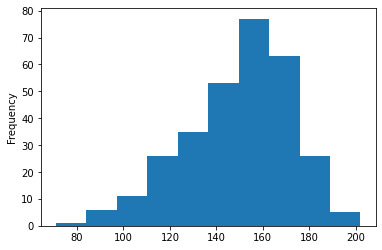

In [12]:
heart['thalachh'].plot(kind='hist')

In [13]:
print(heart['exng'].value_counts())

0    204
1     99
Name: exng, dtype: int64


<AxesSubplot:ylabel='Frequency'>

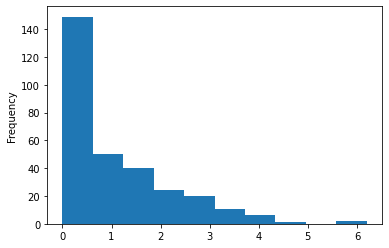

In [14]:
heart['oldpeak'].plot(kind='hist')

In [15]:
print(heart['slp'].value_counts())

2    142
1    140
0     21
Name: slp, dtype: int64


In [16]:
print(heart['caa'].value_counts())

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


In [17]:
print(heart['thall'].value_counts())

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [18]:
print(heart['output'].value_counts())

1    165
0    138
Name: output, dtype: int64


데이터는 0과 1로 나누는 binary_classification이다.

-> Decision Tree, Random Forest, Logistic Regression, DNN을 사용해 볼 수 있겠다.

## 1. 데이터 전처리 X

with sci-kit learn machine learning classifier

In [19]:
heart_data = heart.iloc[:,:-1] # 데이터
heart_label = heart.iloc[:,-1] # 라벨

In [20]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(heart_data, heart_label, test_size=0.3, random_state=15000) 

In [21]:
## 구현
# 간단한 DNN모델 작성 
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_dim=13, activation='relu' ))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()
model.compile(loss='binary_crossentropy', # 손실함수 -> Binary Cross Entropy Loss
             optimizer='adam', # Optimizer로 Adam을 사용. 기본 값: Learning rate = 0.001
             metrics=['accuracy','Recall','Precision']) # 정확도, 재현율, 정밀도

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
______________________________________________________

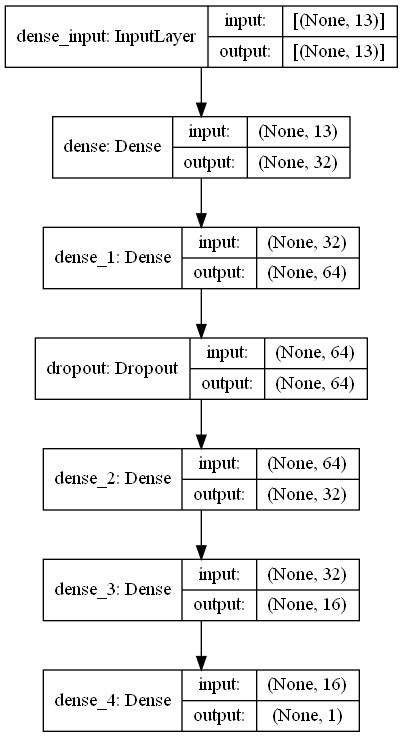

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True) #입력, 출력 데이터의 틀을 보여준다

In [24]:
# 모델을 실행합니다.
# 학습데이터 & 테스트데이터로 계속 확인
history_1 = model.fit(train_X, train_Y, epochs=100, batch_size=1,validation_data=(test_X,test_Y)) # batch_size

Epoch 1/100
212/212 [==============================] - 2s 7ms/step - loss: 2.4534 - accuracy: 0.5330 - recall: 0.4914 - precision: 0.4736 - val_loss: 0.6947 - val_accuracy: 0.4835 - val_recall: 0.4107 - val_precision: 0.6216
Epoch 2/100
212/212 [==============================] - 0s 1ms/step - loss: 0.7388 - accuracy: 0.4983 - recall: 0.4543 - precision: 0.5373 - val_loss: 0.6816 - val_accuracy: 0.6154 - val_recall: 1.0000 - val_precision: 0.6154
Epoch 3/100
212/212 [==============================] - 0s 1ms/step - loss: 0.7449 - accuracy: 0.5321 - recall: 0.7257 - precision: 0.5555 - val_loss: 0.6663 - val_accuracy: 0.6154 - val_recall: 1.0000 - val_precision: 0.6154
Epoch 4/100
212/212 [==============================] - 0s 1ms/step - loss: 0.7327 - accuracy: 0.5416 - recall: 0.6417 - precision: 0.5523 - val_loss: 0.6811 - val_accuracy: 0.6484 - val_recall: 0.6964 - val_precision: 0.7222
Epoch 5/100
212/212 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.6210

212/212 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7904 - recall: 0.7299 - precision: 0.7719 - val_loss: 0.6533 - val_accuracy: 0.7143 - val_recall: 0.8571 - val_precision: 0.7273
Epoch 38/100
212/212 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7957 - recall: 0.8372 - precision: 0.7515 - val_loss: 0.6083 - val_accuracy: 0.6813 - val_recall: 0.7143 - val_precision: 0.7547
Epoch 39/100
212/212 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7751 - recall: 0.7803 - precision: 0.8120 - val_loss: 0.7085 - val_accuracy: 0.6923 - val_recall: 0.7321 - val_precision: 0.7593
Epoch 40/100
212/212 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.7768 - recall: 0.8365 - precision: 0.7611 - val_loss: 0.7137 - val_accuracy: 0.6593 - val_recall: 0.6429 - val_precision: 0.7660
Epoch 41/100
212/212 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8129 - recal

212/212 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8407 - recall: 0.8653 - precision: 0.8429 - val_loss: 0.6278 - val_accuracy: 0.7802 - val_recall: 0.9107 - val_precision: 0.7727
Epoch 74/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8232 - recall: 0.8984 - precision: 0.7460 - val_loss: 0.4806 - val_accuracy: 0.8022 - val_recall: 0.8929 - val_precision: 0.8065
Epoch 75/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8937 - recall: 0.8858 - precision: 0.8858 - val_loss: 0.5822 - val_accuracy: 0.7692 - val_recall: 0.8571 - val_precision: 0.7869
Epoch 76/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8127 - recall: 0.8582 - precision: 0.7703 - val_loss: 0.5622 - val_accuracy: 0.7473 - val_recall: 0.8929 - val_precision: 0.7463
Epoch 77/100
212/212 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8785 - recal

## 2. 데이터 정규화 진행

1. thalachh

2. trtbps

3. chol

에 대해 정규화 진행

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Pandas Series로 뽑으면 데이터가 1차원 데이터가 된다 -> Scaler에 넣기 위해서는 Pandas DataFrame을 만들어야 하는데
# DataFrame 만드는 방법에 Series를 넣어서 만드는 방법이 있네... to_frame...
# 아래 방식은 Pandas Series로 부터 nparray를 추출, 이를 Scaler에 fit & tranform하여 데이터 프레임으로 만들어서
# 기존 DataFrame에 update로 데이터 바꾸는 방식
thalachh = heart['thalachh'].values.reshape(-1,1)
trtbps = heart['trtbps'].values.reshape(-1,1)
chol = heart['chol'].values.reshape(-1,1)

1. MinMaxScaler

In [27]:
mm_norm = MinMaxScaler() # 최소-최대 스케일러

In [28]:
# 스케일러 적용
mm_thalachh = mm_norm.fit_transform(thalachh) 
mm_trtbps = mm_norm.fit_transform(trtbps)
mm_chol = mm_norm.fit_transform(chol)

In [29]:
# 각각의 스케일링 된 데이터를 데이터 프레임으로 만듬.
thalachh = pd.DataFrame(mm_thalachh,columns=['thalachh'])
trtbps = pd.DataFrame(mm_thalachh,columns=['trtbps'])
chol = pd.DataFrame(mm_thalachh,columns=['chol'])

In [30]:
# 기존 데이터에서 deep copy로 dataframe을 복사하여 새 dataframe을 만듬
mm_heart = heart.copy()

In [31]:
mm_heart.head() # 복사 확인

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
 # 3개의 column에 대해 각각 update를 통해 값을 갱신
mm_heart.update(thalachh)
mm_heart.update(trtbps)
mm_heart.update(chol)
mm_heart.head() # 변경 확인.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,0.603053,0.603053,1,0,0.603053,0,2.3,0,0,1,1
1,37,1,2,0.885496,0.885496,0,1,0.885496,0,3.5,0,0,2,1
2,41,0,1,0.770992,0.770992,0,0,0.770992,0,1.4,2,0,2,1
3,56,1,1,0.816794,0.816794,0,1,0.816794,0,0.8,2,0,2,1
4,57,0,0,0.702290,0.702290,0,1,0.702290,1,0.6,2,0,2,1


In [33]:
mm_heart_data = mm_heart.iloc[:,:-1] # 데이터
mm_heart_label = mm_heart.iloc[:,-1] # 라벨

In [34]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
mm_train_X, mm_test_X, mm_train_Y, mm_test_Y = train_test_split(mm_heart_data, mm_heart_label, test_size=0.3, random_state=123 ,stratify = mm_heart_label)

In [35]:
## 구현
# 간단한 DNN모델 작성 
mm_model = keras.models.Sequential()
mm_model.add(keras.layers.Dense(32, input_dim=13, activation='relu' ))
mm_model.add(keras.layers.Dense(64, activation='relu'))
mm_model.add(keras.layers.Dropout(0.2))
mm_model.add(keras.layers.Dense(32, activation='relu'))
mm_model.add(keras.layers.Dense(16, activation='relu'))
mm_model.add(keras.layers.Dense(1, activation='sigmoid'))

In [36]:
mm_model.summary()
mm_model.compile(loss='binary_crossentropy', # 손실함수 -> Binary Cross Entropy Loss
             optimizer='adam', # Optimizer로 Adam을 사용. 기본 값: Learning rate = 0.001
             metrics=['accuracy','Recall','Precision']) # 정확도, 재현율, 정밀도

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
____________________________________________________

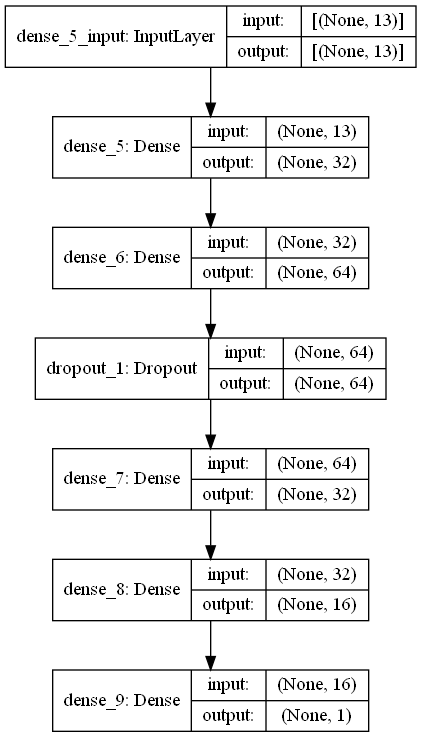

In [37]:
tf.keras.utils.plot_model(mm_model, show_shapes=True) #입력, 출력 데이터의 틀을 보여준다

In [38]:
# 모델을 실행합니다.
history_mm = mm_model.fit(mm_train_X, mm_train_Y, epochs=100, batch_size=1,validation_data=(mm_test_X,mm_test_Y)) # batch_size #확인을 위해서 20번만

Epoch 1/100
212/212 [==============================] - 1s 3ms/step - loss: 0.8525 - accuracy: 0.4507 - recall: 0.3822 - precision: 0.4706 - val_loss: 0.7059 - val_accuracy: 0.5495 - val_recall: 1.0000 - val_precision: 0.5495
Epoch 2/100
212/212 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5916 - recall: 0.6077 - precision: 0.6339 - val_loss: 0.6660 - val_accuracy: 0.5495 - val_recall: 1.0000 - val_precision: 0.5495
Epoch 3/100
212/212 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6479 - recall: 0.7774 - precision: 0.6499 - val_loss: 0.6379 - val_accuracy: 0.5824 - val_recall: 0.2400 - val_precision: 1.0000
Epoch 4/100
212/212 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6736 - recall: 0.7501 - precision: 0.6792 - val_loss: 0.4926 - val_accuracy: 0.7912 - val_recall: 0.9000 - val_precision: 0.7627
Epoch 5/100
212/212 [==============================] - 0s 1ms/step - loss: 0.5413 - accuracy: 0.7317

212/212 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8523 - recall: 0.9121 - precision: 0.8482 - val_loss: 0.3974 - val_accuracy: 0.8242 - val_recall: 0.9000 - val_precision: 0.8036
Epoch 38/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8565 - recall: 0.8928 - precision: 0.8451 - val_loss: 0.4236 - val_accuracy: 0.7912 - val_recall: 0.7600 - val_precision: 0.8444
Epoch 39/100
212/212 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8472 - recall: 0.9238 - precision: 0.8305 - val_loss: 0.4511 - val_accuracy: 0.7582 - val_recall: 0.7000 - val_precision: 0.8333
Epoch 40/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8648 - recall: 0.8960 - precision: 0.8727 - val_loss: 0.4269 - val_accuracy: 0.8242 - val_recall: 0.9000 - val_precision: 0.8036
Epoch 41/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.9073 - recal

212/212 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.7978 - recall: 0.8729 - precision: 0.7480 - val_loss: 0.4571 - val_accuracy: 0.8242 - val_recall: 0.8200 - val_precision: 0.8542
Epoch 74/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3130 - accuracy: 0.8576 - recall: 0.8720 - precision: 0.8295 - val_loss: 0.4841 - val_accuracy: 0.7912 - val_recall: 0.7400 - val_precision: 0.8605
Epoch 75/100
212/212 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.8882 - recall: 0.9044 - precision: 0.8942 - val_loss: 0.5027 - val_accuracy: 0.7692 - val_recall: 0.7000 - val_precision: 0.8537
Epoch 76/100
212/212 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8879 - recall: 0.9099 - precision: 0.9008 - val_loss: 0.4778 - val_accuracy: 0.8132 - val_recall: 0.8200 - val_precision: 0.8367
Epoch 77/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8713 - recal

2. StandardScaler

In [39]:
# Pandas Series로 뽑으면 데이터가 1차원 데이터가 된다 -> Scaler에 넣기 위해서는 Pandas DataFrame을 만들어야 하는데
# DataFrame 만드는 방법에 Series를 넣어서 만드는 방법이 있네... to_frame...
# 아래 방식은 Pandas Series로 부터 nparray를 추출, 이를 Scaler에 fit & tranform하여 데이터 프레임으로 만들어서
# 기존 DataFrame에 update로 데이터 바꾸는 방식
thalachh = heart['thalachh'].values.reshape(-1,1)
trtbps = heart['trtbps'].values.reshape(-1,1)
chol = heart['chol'].values.reshape(-1,1)

In [40]:
std_norm = StandardScaler()  # 정규화 스케일러

In [41]:
# 스케일러 적용
std_thalachh = std_norm.fit_transform(thalachh)
std_trtbps = std_norm.fit_transform(trtbps)
std_chol = std_norm.fit_transform(chol)

In [42]:
# 각각의 스케일링 된 데이터를 데이터 프레임으로 만듬.
thalachh = pd.DataFrame(std_thalachh,columns=['thalachh'])
trtbps = pd.DataFrame(std_trtbps,columns=['trtbps'])
chol = pd.DataFrame(std_chol,columns=['chol'])

In [43]:
# 기존 데이터에서 deep copy로 dataframe을 복사하여 새 dataframe을 만듬
std_heart = heart.copy()

In [44]:
std_heart.head() # 복사 확인

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
 # 3개의 column에 대해 각각 update를 통해 값을 갱신
std_heart.update(thalachh)
std_heart.update(trtbps)
std_heart.update(chol)
std_heart.head() # 변경 확인.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


In [46]:
std_heart_data = std_heart.iloc[:,:-1] # 데이터
std_heart_label = std_heart.iloc[:,-1] # 라벨

In [47]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
std_train_X, std_test_X, std_train_Y, std_test_Y = train_test_split(std_heart_data, std_heart_label, test_size=0.3, random_state=123 ,stratify = std_heart_label)

In [48]:
## 구현
# 간단한 DNN모델 작성 
std_model = keras.models.Sequential()
std_model.add(keras.layers.Dense(32, input_dim=13, activation='relu' ))
std_model.add(keras.layers.Dense(64, activation='relu'))
std_model.add(keras.layers.Dropout(0.2))
std_model.add(keras.layers.Dense(32, activation='relu'))
std_model.add(keras.layers.Dense(16, activation='relu'))
std_model.add(keras.layers.Dense(1, activation='sigmoid'))

In [49]:
std_model.summary()
std_model.compile(loss='binary_crossentropy', # 손실함수 -> Binary Cross Entropy Loss
             optimizer='adam', # Optimizer로 Adam을 사용. 기본 값: Learning rate = 0.001
             metrics=['accuracy','Recall','Precision']) # 정확도, 재현율, 정밀도

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
____________________________________________________

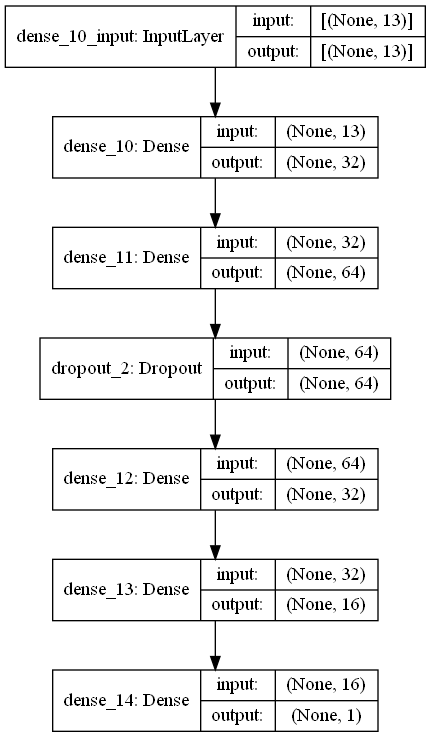

In [50]:
tf.keras.utils.plot_model(std_model, show_shapes=True) #입력, 출력 데이터의 틀을 보여준다

In [51]:
# 모델을 실행합니다.
history_std = std_model.fit(std_train_X, std_train_Y, epochs=100, batch_size=1,validation_data=(std_test_X,std_test_Y)) # batch_size #확인을 위해서 20번만

Epoch 1/100
212/212 [==============================] - 1s 3ms/step - loss: 1.0804 - accuracy: 0.4769 - recall: 0.5010 - precision: 0.4408 - val_loss: 0.6861 - val_accuracy: 0.5495 - val_recall: 1.0000 - val_precision: 0.5495
Epoch 2/100
212/212 [==============================] - 0s 1ms/step - loss: 0.7205 - accuracy: 0.5704 - recall: 0.7444 - precision: 0.5468 - val_loss: 0.6801 - val_accuracy: 0.7033 - val_recall: 0.6200 - val_precision: 0.7949
Epoch 3/100
212/212 [==============================] - 0s 1ms/step - loss: 0.7169 - accuracy: 0.4824 - recall: 0.4050 - precision: 0.5238 - val_loss: 0.6733 - val_accuracy: 0.5714 - val_recall: 1.0000 - val_precision: 0.5618
Epoch 4/100
212/212 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.5810 - recall: 0.7226 - precision: 0.5875 - val_loss: 0.6608 - val_accuracy: 0.4835 - val_recall: 0.0600 - val_precision: 1.0000
Epoch 5/100
212/212 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.5772

212/212 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8428 - recall: 0.9172 - precision: 0.8282 - val_loss: 0.4870 - val_accuracy: 0.8132 - val_recall: 0.9400 - val_precision: 0.7705
Epoch 38/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8393 - recall: 0.9118 - precision: 0.8025 - val_loss: 0.4098 - val_accuracy: 0.8352 - val_recall: 0.8600 - val_precision: 0.8431
Epoch 39/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8271 - recall: 0.8051 - precision: 0.8385 - val_loss: 0.4183 - val_accuracy: 0.8022 - val_recall: 0.7600 - val_precision: 0.8636
Epoch 40/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8408 - recall: 0.8530 - precision: 0.8526 - val_loss: 0.4030 - val_accuracy: 0.8132 - val_recall: 0.8200 - val_precision: 0.8367
Epoch 41/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8817 - recal

212/212 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8561 - recall: 0.8442 - precision: 0.8641 - val_loss: 0.4616 - val_accuracy: 0.8132 - val_recall: 0.8200 - val_precision: 0.8367
Epoch 74/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8835 - recall: 0.9151 - precision: 0.8881 - val_loss: 0.4402 - val_accuracy: 0.8352 - val_recall: 0.8800 - val_precision: 0.8302
Epoch 75/100
212/212 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8650 - recall: 0.9292 - precision: 0.8507 - val_loss: 0.4679 - val_accuracy: 0.7912 - val_recall: 0.7000 - val_precision: 0.8974
Epoch 76/100
212/212 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8564 - recall: 0.8644 - precision: 0.8710 - val_loss: 0.4486 - val_accuracy: 0.8242 - val_recall: 0.8000 - val_precision: 0.8696
Epoch 77/100
212/212 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.9000 - recal